In [ ]:
from transformers import AutoModel, AutoTokenizer
from tokenizers import SentencePieceBPETokenizer
import torch
from transformers import PreTrainedTokenizerFast
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
with open("sp_trainer_data.txt", "r") as f:
    text = f.read()

tokenizer = SentencePieceBPETokenizer()
tokenizer.train_from_iterator(
    text,
    vocab_size=30_000,
    min_frequency=5,
    show_progress=True,
    limit_alphabet=500,
)

transformer_tokenizer = PreTrainedTokenizerFast(
    tokenizer_object=tokenizer
)

In [ ]:
model_name = "ckiplab/gpt2-base-chinese" #"hfl/chinese-bert-wwm" #"bert-base-chinese"
from transformers import AutoTokenizer, AutoModelForCausalLM
#tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

inputs = transformer_tokenizer("我们喝了柠檬水,很舒服", return_tensors="pt")
outputs = model(**inputs)

In [10]:
transformer_tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

['▁我', '们', '<unk>', '了', '<unk>', '<unk>', '水', ',', '很', '<unk>', '服']

<class 'numpy.ndarray'>


/Users/Emma/Desktop/capstone/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/Emma/Desktop/capstone/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20204 (\N{CJK UNIFIED IDEOGRAPH-4EEC}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/Emma/Desktop/capstone/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/Emma/Desktop/capstone/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/Emma/Desktop/capstone/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 24456 (\N{CJK UNIFIED IDEOGRAPH-5F88}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/Emma/Des

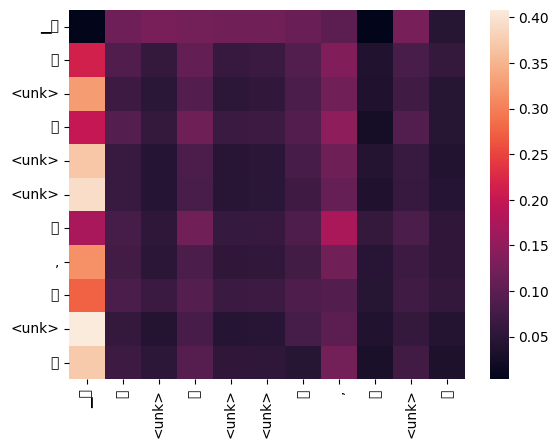

In [14]:
layer = 0
head = 0
attention_matrix = torch.stack(outputs.attentions).cpu()[layer][0][head].detach().numpy()
print(type(attention_matrix))
sns.heatmap(attention_matrix, xticklabels=transformer_tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]), yticklabels=transformer_tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]))
plt.show()